In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import tensorflow as tf
from tensorflow import keras

In [ ]:
dft = pd.read_csv('train.csv')
dft.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,338,15,628,0.509709,1.0,0.645084,14,1,1,0,...,0.033333,0.8,-0.259184,-0.500000,-0.100000,0.458333,0.333333,0.041667,0.333333,16100
1,715,11,409,0.519608,1.0,0.657480,2,0,1,0,...,0.136364,0.5,-0.133333,-0.166667,-0.100000,0.000000,0.000000,0.500000,0.000000,508
2,262,7,345,0.609329,1.0,0.783920,5,2,1,0,...,0.062500,0.6,-0.282639,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,279,11,217,0.580189,1.0,0.775000,8,2,3,0,...,0.033333,0.5,-0.098214,-0.125000,-0.071429,0.550000,0.200000,0.050000,0.200000,3100
4,647,13,123,0.739837,1.0,0.887324,3,0,1,0,...,0.200000,1.0,-0.550000,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,6900


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      31715 non-null  int64  
 1    n_tokens_title                 31715 non-null  int64  
 2    n_tokens_content               31715 non-null  int64  
 3    n_unique_tokens                31715 non-null  float64
 4    n_non_stop_words               31715 non-null  float64
 5    n_non_stop_unique_tokens       31715 non-null  float64
 6    num_hrefs                      31715 non-null  int64  
 7    num_self_hrefs                 31715 non-null  int64  
 8    num_imgs                       31715 non-null  int64  
 9    num_videos                     31715 non-null  int64  
 10   average_token_length           31715 non-null  float64
 11   num_keywords                   31715 non-null  int64  
 12   data_channel_is_lifestyle      

In [ ]:
dft.isnull().sum()

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

In [ ]:
dft.shape

(31715, 60)

In [ ]:
dft.shape

(31715, 60)

In [ ]:
corr=dft.corr()

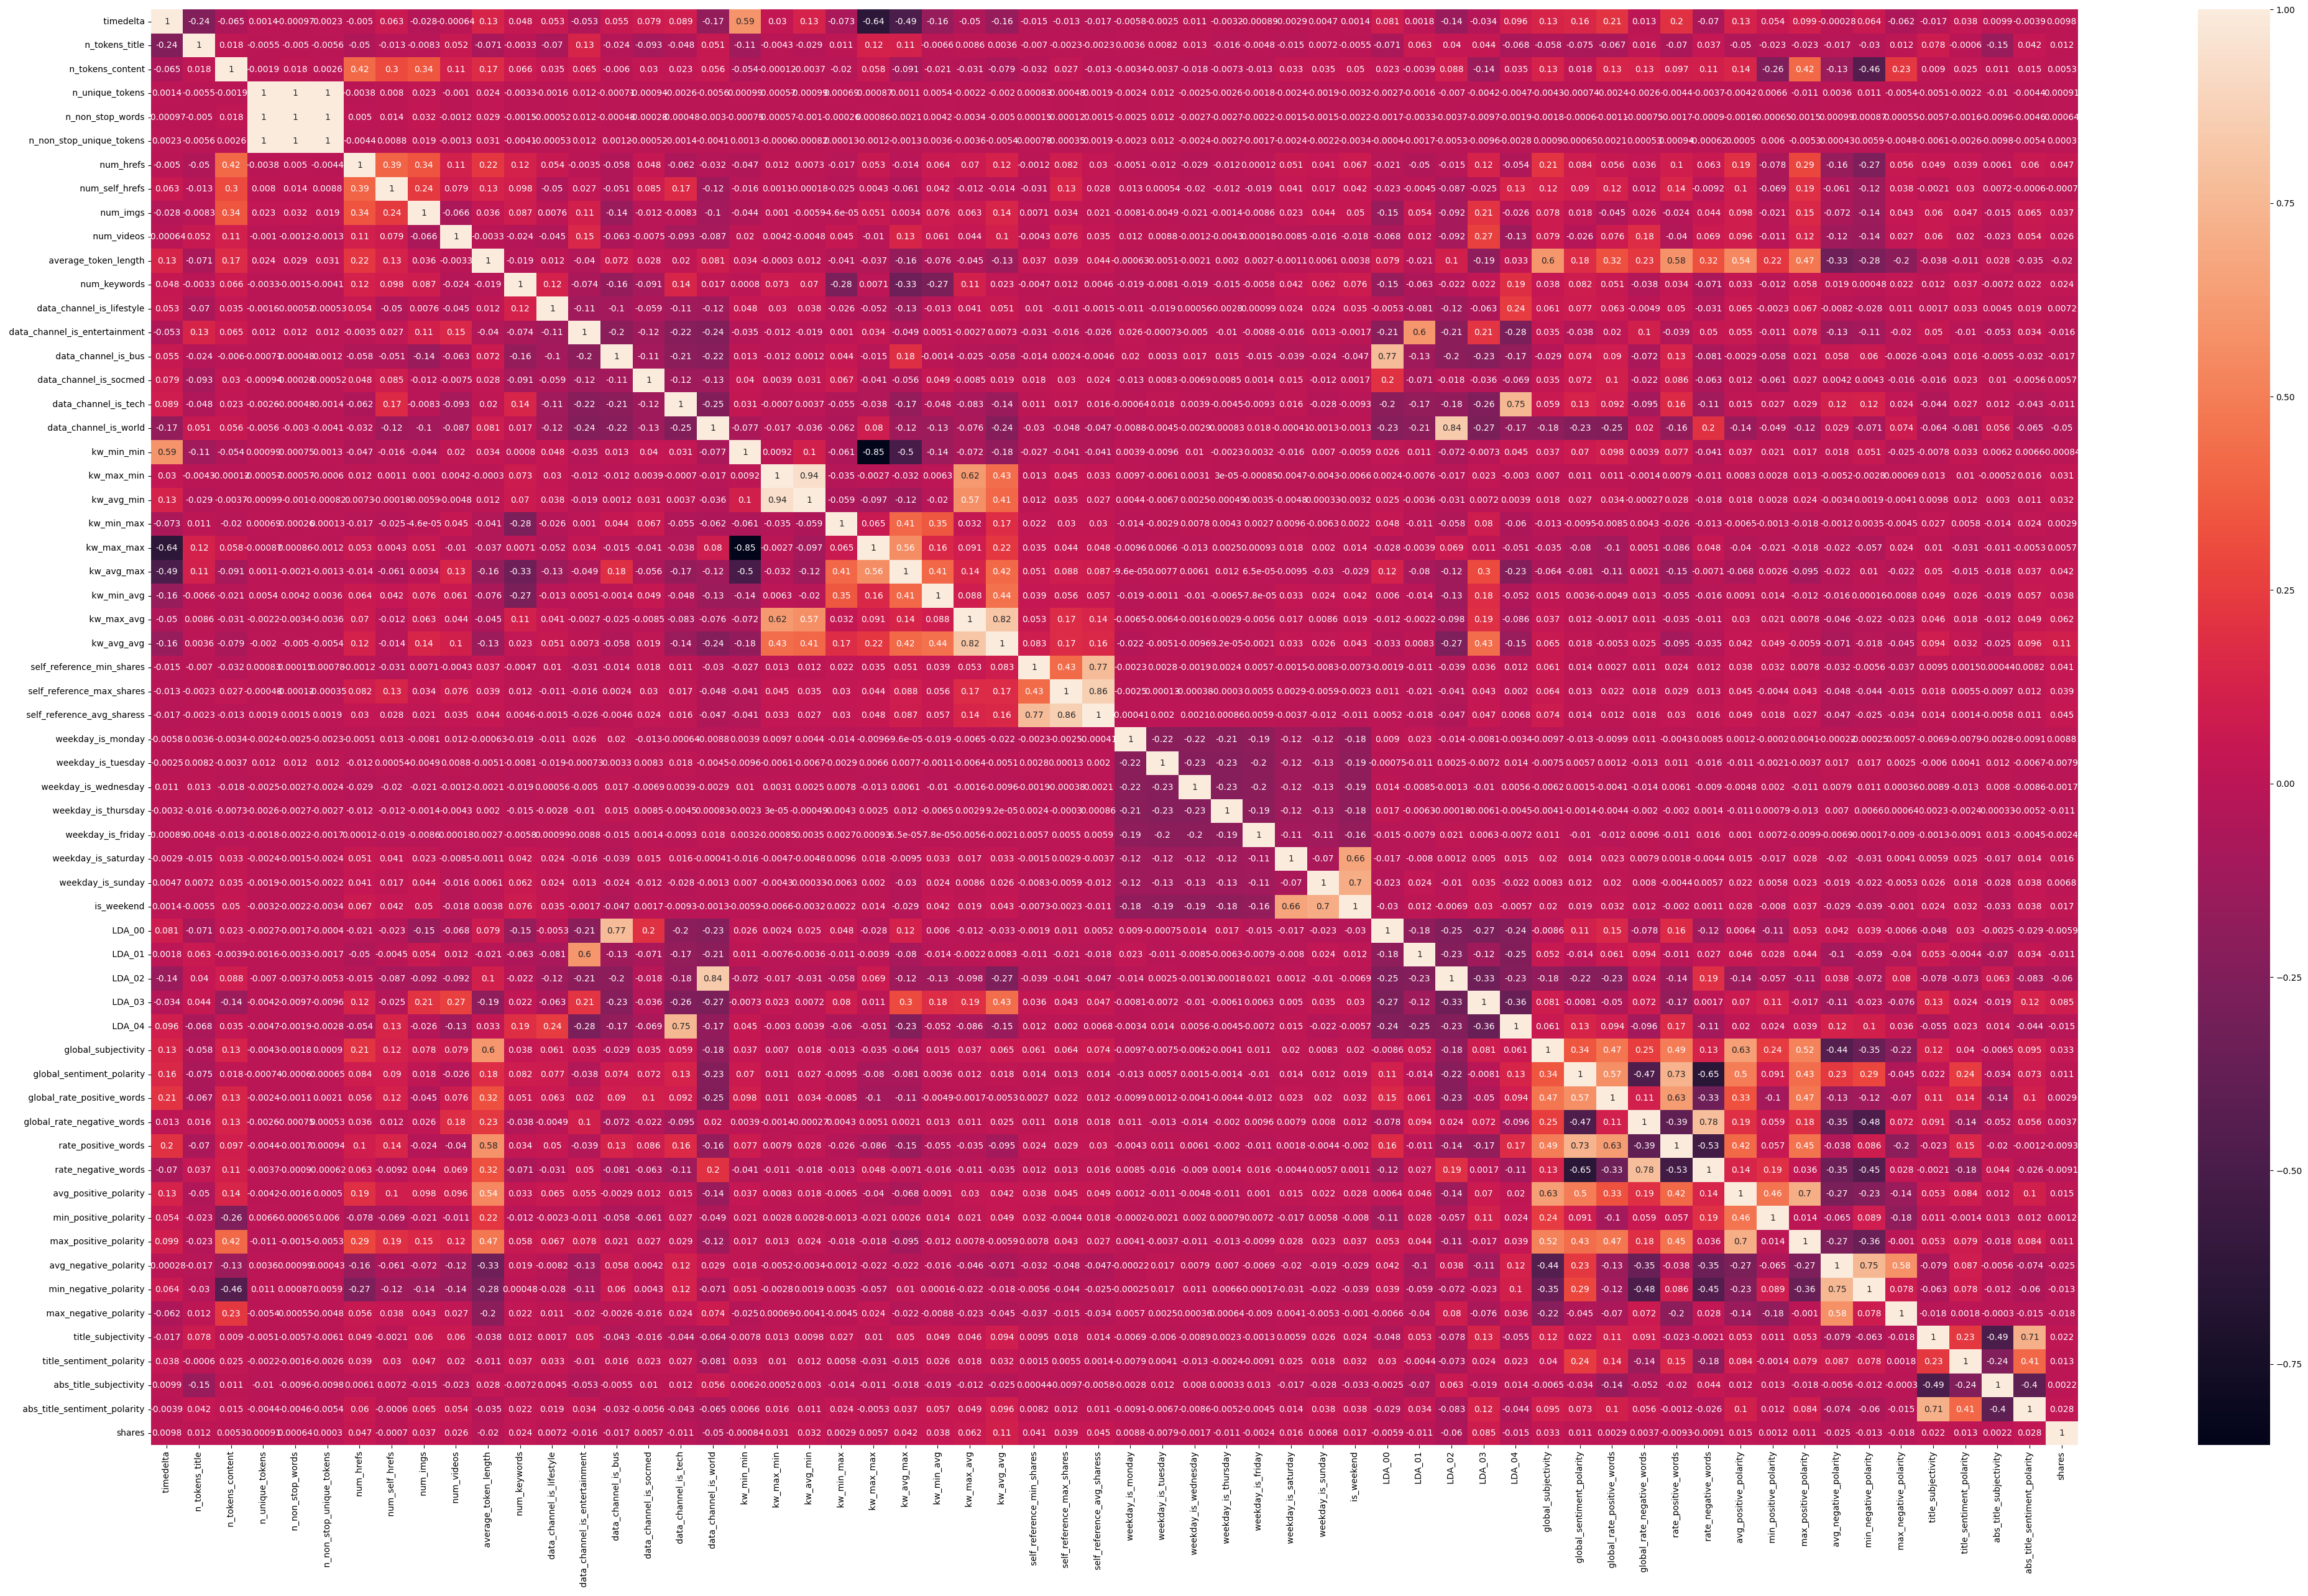

In [ ]:
plt.figure(figsize=(50,30))
sn.heatmap(corr,annot=True)
plt.show()

In [ ]:
dft.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,338,15,628,0.509709,1.0,0.645084,14,1,1,0,...,0.033333,0.8,-0.259184,-0.500000,-0.100000,0.458333,0.333333,0.041667,0.333333,16100
1,715,11,409,0.519608,1.0,0.657480,2,0,1,0,...,0.136364,0.5,-0.133333,-0.166667,-0.100000,0.000000,0.000000,0.500000,0.000000,508
2,262,7,345,0.609329,1.0,0.783920,5,2,1,0,...,0.062500,0.6,-0.282639,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,279,11,217,0.580189,1.0,0.775000,8,2,3,0,...,0.033333,0.5,-0.098214,-0.125000,-0.071429,0.550000,0.200000,0.050000,0.200000,3100
4,647,13,123,0.739837,1.0,0.887324,3,0,1,0,...,0.200000,1.0,-0.550000,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,6900


In [ ]:
correlation_matrix = dft.corr()
target_column = 'shares'
low_corr_columns = correlation_matrix[correlation_matrix[target_column].abs() <= 0.015].index
dft = dft.drop(low_corr_columns, axis=1)
print("Dropped columns with correlation with '{}' less than 0.015:".format(target_column))
print(low_corr_columns)

Dropped columns with correlation with 'shares' less than 0.015:
Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_self_hrefs', ' data_channel_is_lifestyle',
       ' data_channel_is_socmed', ' data_channel_is_tech', ' kw_min_min',
       ' kw_min_max', ' kw_max_max', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_sunday', ' LDA_00', ' LDA_01',
       ' LDA_04', ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' min_negative_polarity', ' title_sentiment_polarity',
       ' abs_title_subjectivity'],
      dtype='object')


In [ ]:
dft.shape

(31715, 27)

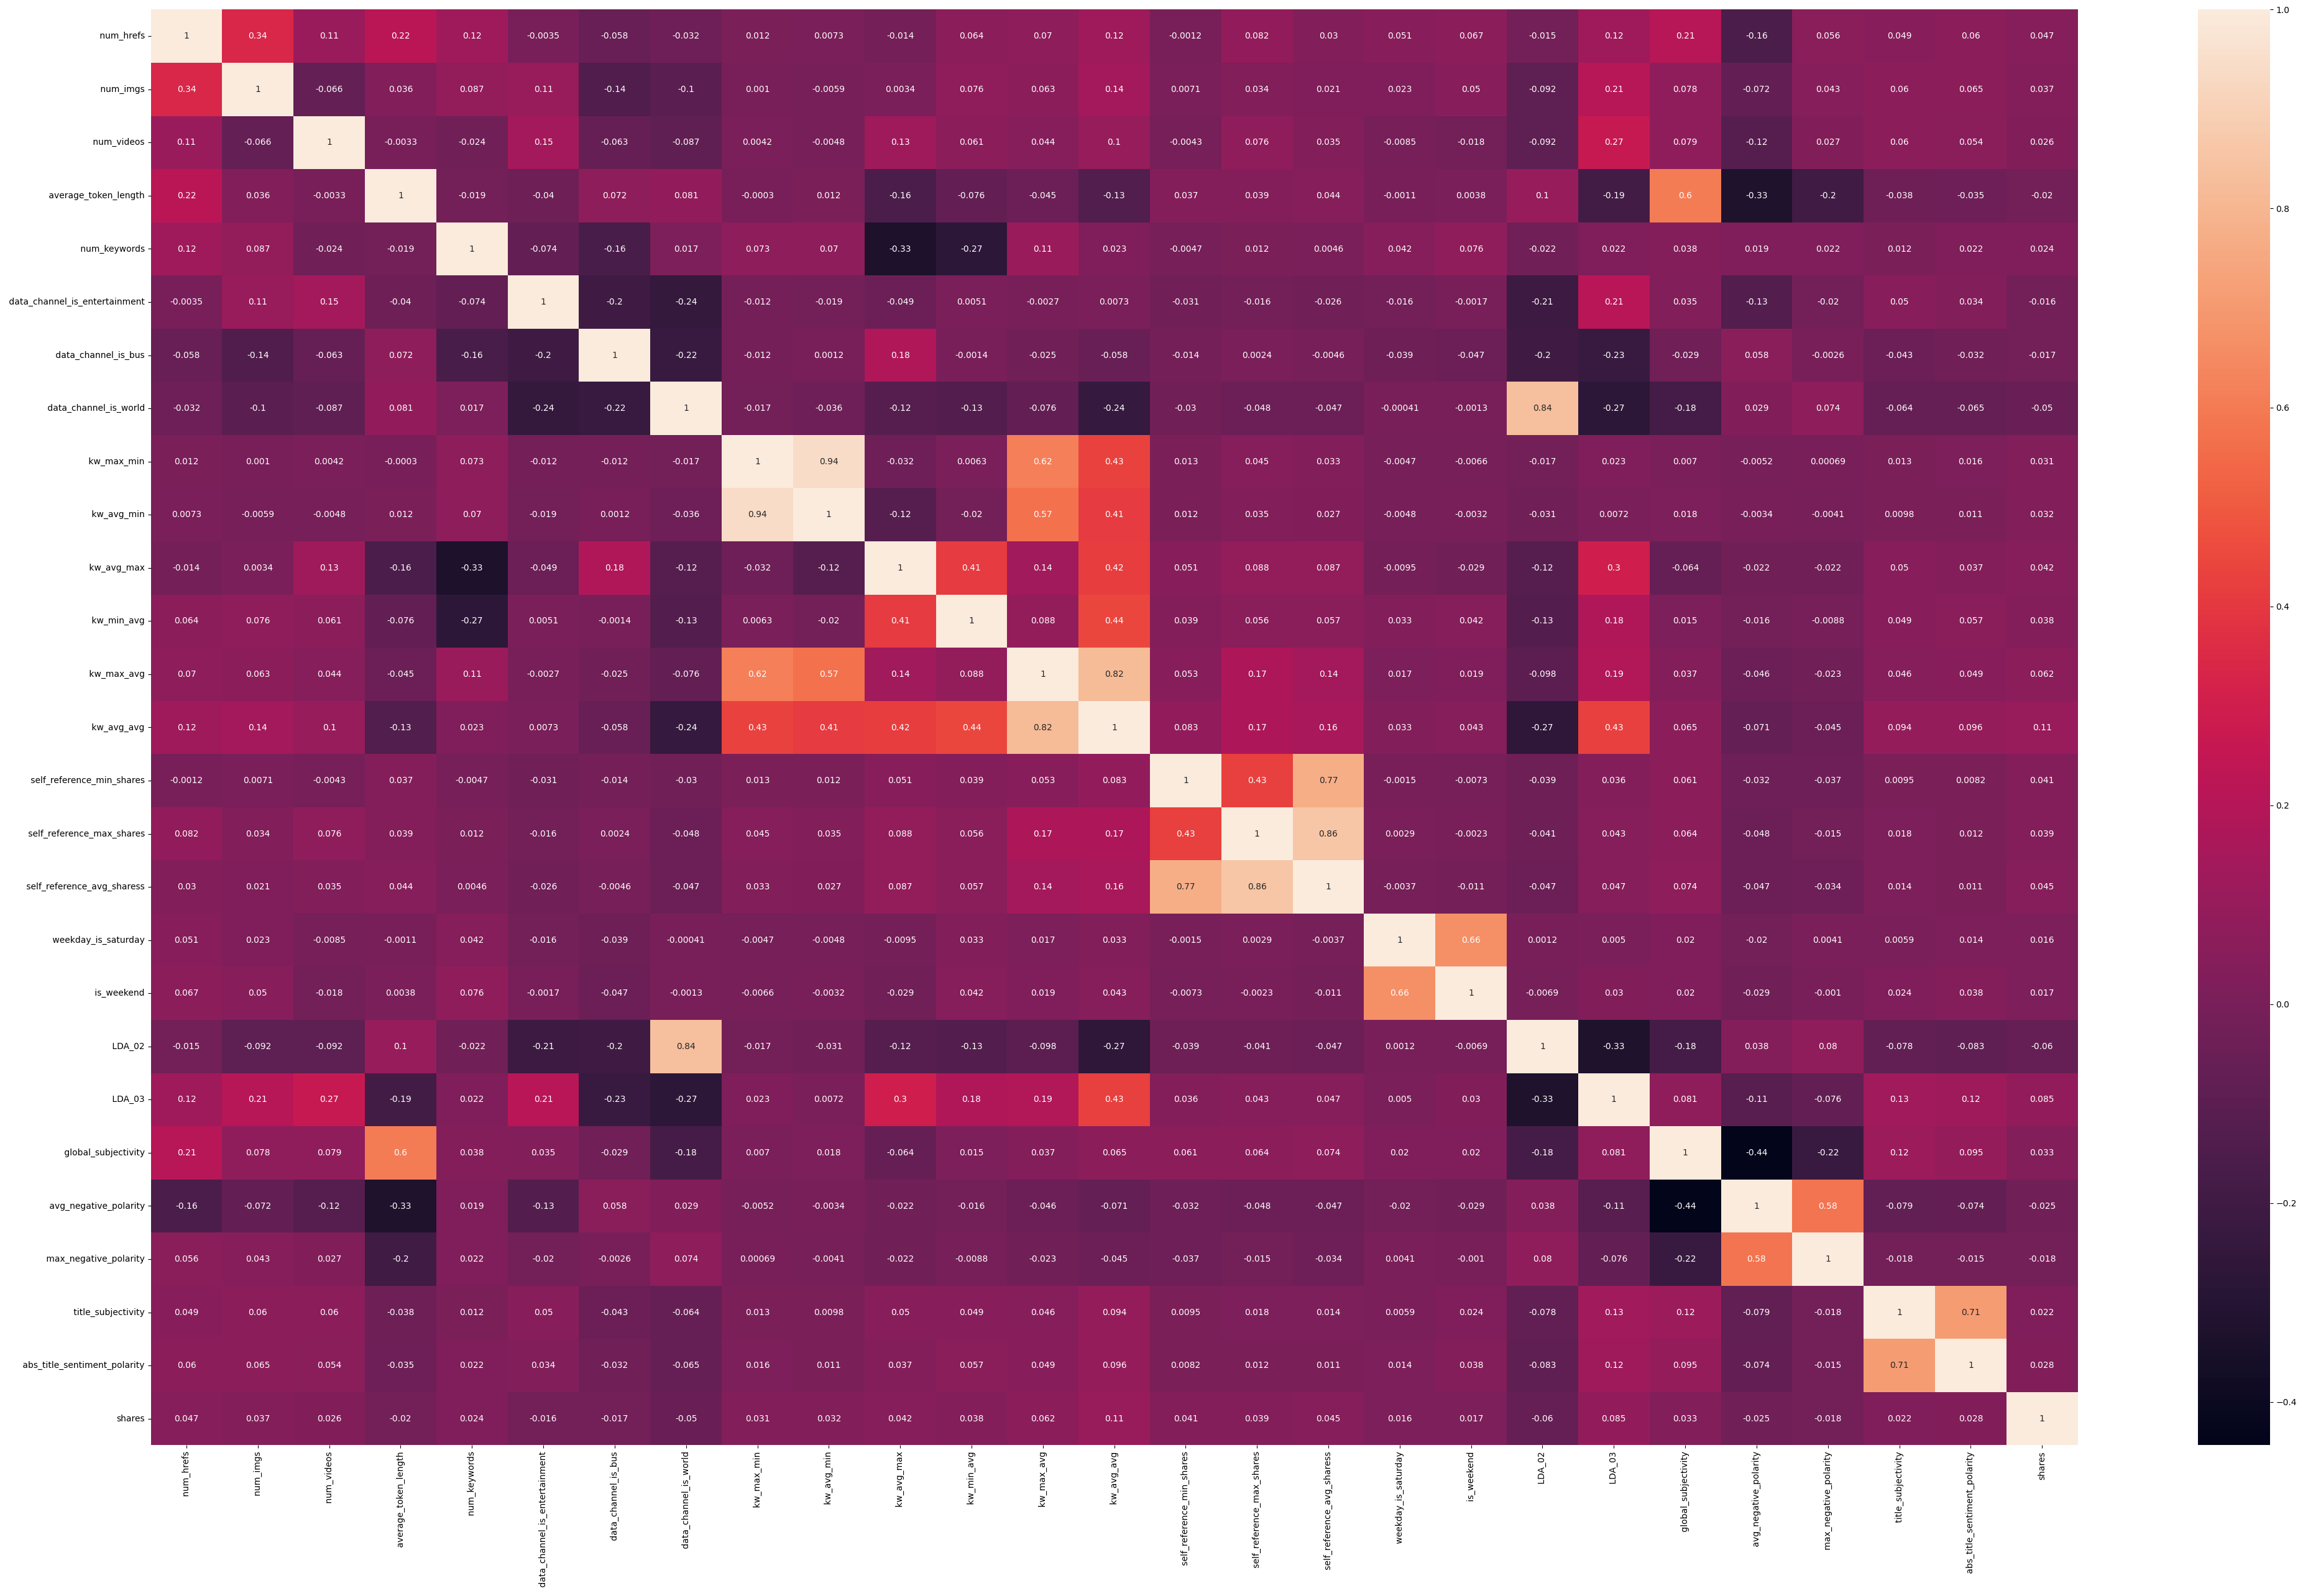

In [ ]:
corr1=dft.corr()
plt.figure(figsize=(50,30))
sn.heatmap(corr1,annot=True)
plt.show()

In [ ]:
X_train=dft.drop('shares',axis=1)
y_train=dft['shares']

In [ ]:
X_train

,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,kw_max_min,kw_avg_min,...,self_reference_avg_sharess,weekday_is_saturday,is_weekend,LDA_02,LDA_03,global_subjectivity,avg_negative_polarity,max_negative_polarity,title_subjectivity,abs_title_sentiment_polarity
0,14,1,0,5.090764,7,0,1,0,677.0,300.512857,...,737.000000,0,0,0.028869,0.442476,0.316004,-0.259184,-0.100000,0.458333,0.333333
1,2,1,0,4.958435,4,0,0,1,924.0,463.250000,...,0.000000,0,0,0.798440,0.050000,0.272373,-0.133333,-0.100000,0.000000,0.000000
2,5,1,0,4.942029,5,0,0,0,165.0,96.800000,...,7300.000000,0,0,0.595622,0.282132,0.505561,-0.282639,-0.050000,0.000000,0.000000
3,8,3,0,4.520737,7,0,0,0,715.0,198.431667,...,0.000000,0,0,0.028638,0.028629,0.501918,-0.098214,-0.071429,0.550000,0.200000
4,3,1,0,4.479675,4,0,0,0,1900.0,778.000000,...,0.000000,0,0,0.050023,0.050023,0.500529,-0.550000,-0.100000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,3,0,1,4.878049,6,0,0,0,730.0,376.400000,...,0.000000,0,0,0.033383,0.033750,0.537879,0.000000,0.000000,0.000000,0.000000
31711,14,10,0,4.756881,7,0,0,0,468.0,165.142857,...,2400.000000,1,1,0.028572,0.385166,0.551111,-0.147917,-0.050000,0.694444,0.375000
31712,5,2,0,4.691860,8,1,0,0,828.0,273.000000,...,2621.666667,0,0,0.025001,0.025055,0.248168,-0.104233,-0.050000,0.150000,0.050000
31713,4,0,2,4.322222,8,0,0,0,2100.0,605.000000,...,952.000000,0,0,0.278784,0.646107,0.460417,-0.200000,-0.200000,0.500000,0.250000


In [ ]:
y_train

0        16100
1          508
2         1300
3         3100
4         6900
         ...  
31710     3700
31711      492
31712     1100
31713     1500
31714      829
Name: shares, Length: 31715, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalerX = MinMaxScaler(feature_range=(0, 1))
scaled_data_X = scalerX.fit_transform(X_train)

arr_2d = y_train.values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_arr_2d = scaler.fit_transform(arr_2d)
scaled_y = scaled_arr_2d.flatten()

scaled_X = pd.DataFrame(scaled_data_X, columns=X_train.columns)

In [ ]:
scaled_y

array([0.0190905 , 0.00060121, 0.00154038, ..., 0.00130322, 0.00177754,
       0.00098186])

In [ ]:
scaled_X

,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,kw_max_min,kw_avg_min,...,self_reference_avg_sharess,weekday_is_saturday,is_weekend,LDA_02,LDA_03,global_subjectivity,avg_negative_polarity,max_negative_polarity,title_subjectivity,abs_title_sentiment_polarity
0,0.046053,0.007812,0.000000,0.633059,0.666667,0.0,1.0,0.0,0.002269,0.007040,...,0.001067,0.0,0.0,0.031379,0.478072,0.316004,0.740816,0.900000,0.458333,0.333333
1,0.006579,0.007812,0.000000,0.616603,0.333333,0.0,0.0,1.0,0.003097,0.010840,...,0.000000,0.0,0.0,0.867870,0.054023,0.272373,0.866667,0.900000,0.000000,0.000000
2,0.016447,0.007812,0.000000,0.614563,0.444444,0.0,0.0,0.0,0.000553,0.002284,...,0.010574,0.0,0.0,0.647416,0.304828,0.505561,0.717361,0.950000,0.000000,0.000000
3,0.026316,0.023438,0.000000,0.562174,0.666667,0.0,0.0,0.0,0.002396,0.004656,...,0.000000,0.0,0.0,0.031129,0.030932,0.501918,0.901786,0.928571,0.550000,0.200000
4,0.009868,0.007812,0.000000,0.557067,0.333333,0.0,0.0,0.0,0.006367,0.018189,...,0.000000,0.0,0.0,0.054372,0.054047,0.500529,0.450000,0.900000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,0.009868,0.000000,0.010989,0.606607,0.555556,0.0,0.0,0.0,0.002446,0.008812,...,0.000000,0.0,0.0,0.036286,0.036465,0.537879,1.000000,1.000000,0.000000,0.000000
31711,0.046053,0.078125,0.000000,0.591539,0.666667,0.0,0.0,0.0,0.001568,0.003879,...,0.003476,1.0,1.0,0.031056,0.416152,0.551111,0.852083,0.950000,0.694444,0.375000
31712,0.016447,0.015625,0.000000,0.583453,0.777778,1.0,0.0,0.0,0.002775,0.006398,...,0.003797,0.0,0.0,0.027175,0.027070,0.248168,0.895767,0.950000,0.150000,0.050000
31713,0.013158,0.000000,0.021978,0.537487,0.777778,0.0,0.0,0.0,0.007038,0.014149,...,0.001379,0.0,0.0,0.303026,0.698084,0.460417,0.800000,0.800000,0.500000,0.250000


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_shape=(26,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)
model.fit(scaled_X, scaled_y, epochs=10)


Epoch 1/10
992/992 [==============================] - 6s 5ms/step - loss: 3.2465e-04 - mae: 0.0066
Epoch 2/10
992/992 [==============================] - 4s 4ms/step - loss: 2.0255e-04 - mae: 0.0047
Epoch 3/10
992/992 [==============================] - 4s 4ms/step - loss: 1.9896e-04 - mae: 0.0044
Epoch 4/10
992/992 [==============================] - 5s 5ms/step - loss: 1.9574e-04 - mae: 0.0040
Epoch 5/10
992/992 [==============================] - 4s 4ms/step - loss: 1.9405e-04 - mae: 0.0038
Epoch 6/10
992/992 [==============================] - 4s 4ms/step - loss: 1.9411e-04 - mae: 0.0039
Epoch 7/10
992/992 [==============================] - 5s 5ms/step - loss: 1.9371e-04 - mae: 0.0038
Epoch 8/10
992/992 [==============================] - 4s 4ms/step - loss: 1.9376e-04 - mae: 0.0038
Epoch 9/10
992/992 [==============================] - 4s 4ms/step - loss: 1.9346e-04 - mae: 0.0039
Epoch 10/10
992/992 [==============================] - 4s 4ms/step - loss: 1.9316e-04 - mae: 0.0038


In [ ]:
dftest = pd.read_csv('test.csv')
dftest.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,121,12,1015,0.422018,1.0,0.545031,10,6,33,1,...,0.100000,0.8,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900
1,532,9,503,0.569697,1.0,0.737542,9,0,1,1,...,0.136364,1.0,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300
2,435,9,232,0.646018,1.0,0.748428,12,3,4,1,...,0.375000,0.5,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700
3,134,12,171,0.722892,1.0,0.867925,9,5,0,1,...,0.500000,0.5,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500
4,728,11,286,0.652632,1.0,0.800000,5,2,0,0,...,0.100000,0.6,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400


In [ ]:
dftest.drop(columns=[' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_self_hrefs', ' data_channel_is_lifestyle',
       ' data_channel_is_socmed', ' data_channel_is_tech', ' kw_min_min',
       ' kw_min_max', ' kw_max_max', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_sunday', ' LDA_00', ' LDA_01',
       ' LDA_04', ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' min_negative_polarity', ' title_sentiment_polarity',
       ' abs_title_subjectivity'],inplace=True)

In [ ]:
dftest.shape

(7929, 27)

In [ ]:
X_test=dftest.drop('shares',axis=1)
y_test=dftest['shares']

In [ ]:
# scaled_data_test = scaler.fit_transform(dftest)

# scaled_df_test = pd.DataFrame(scaled_data_test, columns=dftest.columns)

from sklearn.preprocessing import MinMaxScaler

scalerX_t = MinMaxScaler(feature_range=(0, 1))
scaled_data_X_t = scalerX_t.fit_transform(X_test)

arr_2d_t = y_test.values.reshape(-1, 1)
scaler_t = MinMaxScaler(feature_range=(0, 1))
scaled_arr_2d_t = scaler_t.fit_transform(arr_2d_t)
scaled_y_t = scaled_arr_2d_t.flatten()

scaled_X_t = pd.DataFrame(scaled_data_X_t, columns=X_test.columns)

In [ ]:
scaled_y_t

array([0.00439902, 0.00194831, 0.02706809, ..., 0.00076585, 0.00485853,
       0.00210148])

In [ ]:
scaled_X_t

,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,kw_max_min,kw_avg_min,...,self_reference_avg_sharess,weekday_is_saturday,is_weekend,LDA_02,LDA_03,global_subjectivity,avg_negative_polarity,max_negative_polarity,title_subjectivity,abs_title_sentiment_polarity
0,0.062893,0.297297,0.013514,0.645037,0.333333,0.0,1.0,0.0,0.003207,0.008525,...,0.007678,0.0,0.0,0.035321,0.034904,0.471175,0.839286,0.928571,0.0,0.00
1,0.056604,0.009009,0.013514,0.634008,1.000000,0.0,0.0,0.0,0.039024,0.040196,...,0.000000,0.0,0.0,0.340890,0.001877,0.477791,0.842500,0.900000,0.0,0.00
2,0.075472,0.036036,0.013514,0.683714,0.555556,0.0,0.0,0.0,0.011451,0.015266,...,0.035693,0.0,0.0,0.016801,0.933682,0.522234,0.572500,0.812500,0.0,0.00
3,0.056604,0.000000,0.013514,0.688621,0.555556,0.0,1.0,0.0,0.025610,0.034035,...,0.003053,0.0,0.0,0.016801,0.199401,0.405128,0.783333,0.833333,0.4,0.25
4,0.031447,0.000000,0.000000,0.693640,0.777778,0.0,0.0,0.0,0.006732,0.027310,...,0.000975,0.0,0.0,0.007577,0.007583,0.418036,0.748214,0.900000,0.2,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7924,0.044025,0.018018,0.000000,0.643658,0.555556,0.0,0.0,0.0,0.007671,0.016604,...,0.009902,0.0,0.0,0.470156,0.018856,0.357836,0.816667,0.875000,0.0,0.00
7925,0.075472,0.009009,0.000000,0.611402,0.888889,0.0,1.0,0.0,0.029268,0.045166,...,0.002490,0.0,0.0,0.181657,0.004323,0.367129,0.781944,0.950000,0.0,0.00
7926,0.037736,0.009009,0.027027,0.592465,0.888889,1.0,0.0,0.0,0.006561,0.018196,...,0.000834,0.0,0.0,0.004482,0.542098,0.579622,0.574379,0.975000,0.0,0.00
7927,0.031447,0.000000,0.013514,0.633469,0.666667,0.0,0.0,0.0,0.012195,0.021981,...,0.002965,0.0,0.0,0.328038,0.011312,0.475420,0.694444,0.900000,0.0,0.00


In [ ]:
y_pred=model.predict(scaled_X_t)

248/248 [==============================] - 1s 2ms/step


In [ ]:
scaled_y_t

array([0.00439902, 0.00194831, 0.02706809, ..., 0.00076585, 0.00485853,
       0.00210148])

In [ ]:
y_pred

array([[0.00275441],
       [0.00271861],
       [0.00781225],
       ...,
       [0.00254255],
       [0.00302464],
       [0.00157632]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(scaled_y_t, y_pred)
mse = mean_squared_error(scaled_y_t, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.004026817513561332
Mean Squared Error (MSE): 0.0002773549529076374
